In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [26]:
(X_train,y_train) , (X_test, y_test)= keras.datasets.mnist.load_data()

In [27]:
len(X_train)

60000

In [28]:
len(X_test)

10000

In [29]:
X_train[0].shape

(28, 28)

In [30]:
X_train[0].shape

(28, 28)

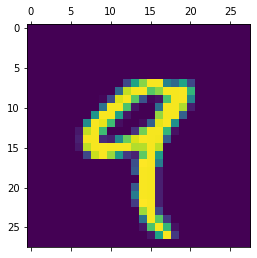

In [31]:
plt.matshow(X_train[4])

In [38]:
y_train[4]

9

In [39]:
X_train = X_train/255
X_test= X_test/255

In [41]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
X_train_flat = X_train.reshape(len(X_train), 28*28)

In [43]:
X_train_flat[0].shape

(784,)

In [44]:
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [45]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape =(784,), activation= "sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 1s 563us/step - loss: 0.7239 - accuracy: 0.8135
Epoch 2/5
1875/1875 [==============================] - 1s 550us/step - loss: 0.3051 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 534us/step - loss: 0.2881 - accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 1s 561us/step - loss: 0.2746 - accuracy: 0.9222
Epoch 5/5
1875/1875 [==============================] - 1s 546us/step - loss: 0.2605 - accuracy: 0.9263


In [46]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 505us/step - loss: 0.2653 - accuracy: 0.9262


[0.2653241455554962, 0.9261999726295471]

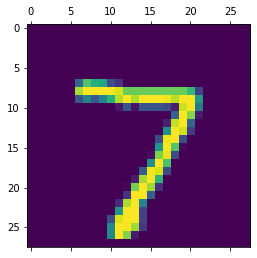

In [50]:
plt.matshow(X_test[0])

In [51]:
y_predict= model.predict(X_test_flat)

In [52]:
y_predict[0]

array([1.5263259e-02, 2.1834620e-07, 3.9841264e-02, 9.6510577e-01,
       2.4012923e-03, 1.1724937e-01, 1.9489494e-06, 9.9974054e-01,
       7.6963395e-02, 6.1781478e-01], dtype=float32)

In [53]:
np.argmax(y_predict[0])

7

In [55]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [58]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    5,    9,    3,    2,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [   3,    7,  921,   19,    8,    5,   13,   10,   42,    4],
       [   1,    0,   18,  924,    1,   26,    2,    9,   21,    8],
       [   1,    1,    5,    1,  909,    0,   10,    4,    9,   42],
       [   7,    1,    2,   31,    6,  786,   17,    4,   31,    7],
       [   7,    3,    5,    1,    7,   11,  920,    2,    2,    0],
       [   1,    5,   20,   11,    9,    0,    0,  948,    3,   31],
       [   7,    6,    7,   20,    9,   28,    9,   11,  867,   10],
       [   9,    5,    2,   12,   25,    7,    0,   22,    7,  920]])>

Text(69.0, 0.5, 'Truth')

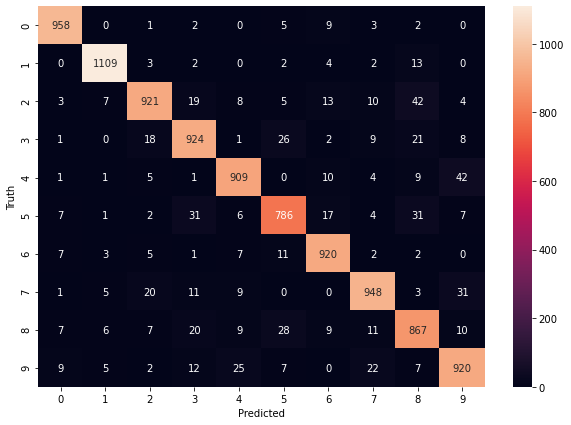

In [63]:
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape =(28,28)),
        keras.layers.Dense(200, activation= "relu"),
        keras.layers.Dense(100, activation= "relu"),
        keras.layers.Dense(10, activation= "sigmoid")

])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs= 8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3921 - accuracy: 0.8812
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0912 - accuracy: 0.9709
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0590 - accuracy: 0.9817
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0409 - accuracy: 0.9870
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9895
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0248 - accuracy: 0.9912
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9937


In [87]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0824 - accuracy: 0.9792


[0.08236120641231537, 0.979200005531311]

In [88]:
y_predict= model.predict(X_test)

In [89]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [90]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    0,    5,    0,    2,    1],
       [   0, 1126,    5,    0,    0,    1,    2,    0,    1,    0],
       [   2,    1, 1011,    3,    3,    0,    2,    1,    9,    0],
       [   1,    0,    9,  982,    0,    9,    0,    1,    5,    3],
       [   1,    0,    0,    2,  962,    0,    7,    1,    0,    9],
       [   2,    0,    0,    7,    1,  864,    8,    1,    9,    0],
       [   3,    3,    1,    1,    2,    1,  946,    0,    1,    0],
       [   1,    4,   17,    4,    1,    0,    0,  988,    6,    7],
       [   4,    0,    1,    2,    0,    0,    1,    2,  962,    2],
       [   2,    3,    0,    4,   12,    1,    1,    3,    4,  979]])>

Text(69.0, 0.5, 'Truth')

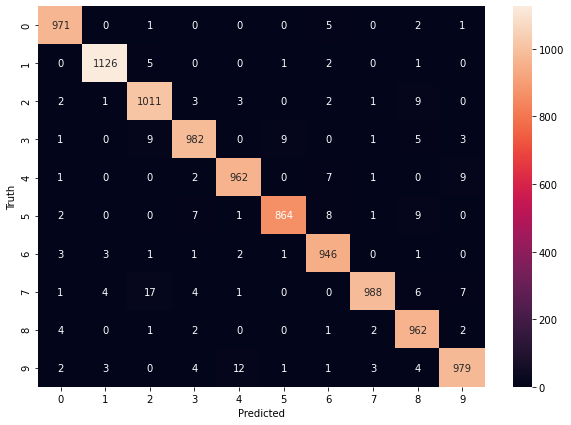

In [91]:
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')